In [6]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split


In [7]:
''' train and test path '''
train_path = 'Training'
test_path = 'Testing'

In [8]:
File=[]
for f in os.listdir(train_path):
    File += [f]

'''  total number of classes '''
print(File)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [11]:
''' reading images '''

train_data = []

''' label encoding '''
mapping={'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2, 'glioma_tumor':3}

count=0

for f in os.listdir(train_path):
    ''' joining path '''
    path = os.path.join(train_path, f)
    for im in os.listdir(path):
        ''' loading an image '''
        img = load_img(os.path.join(path, im), color_mode='rgb', target_size=(150, 150))
        ''' converting an image to array '''
        img = img_to_array(img)
        ''' scaling  '''
        img = img / 255.0
        ''' appending image to train_data '''
        train_data.append([img, count])     
    count=count+1

In [12]:
test_data = []

''' label encoding '''
mapping={'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2, 'glioma_tumor':3}
count=0

for f in os.listdir(test_path):
    ''' joining path '''
    path=os.path.join(test_path, f)
    for im in os.listdir(path):
        ''' loading an image '''
        img = load_img(os.path.join(path, im), color_mode='rgb', target_size=(150,150))
        ''' converting an image to array '''
        img = img_to_array(img)
        ''' scaling '''
        img = img/255.0
        ''' appending an image to test_data'''
        test_data.append([img, count])         
    count=count+1

In [15]:
train_images, train_labels = zip(*train_data)
test_images, test_labels = zip(*test_data)

In [17]:
''' converting labels into to_categorical '''
train_labels = to_categorical(train_labels)

''' coverting train_images into numpy array '''
train_images = np.array(train_images)

''' converting train_labesl into numpy array '''
train_labels = np.array(train_labels)

''' shaep of train_images and train_labels '''
print(train_images.shape)
print(train_labels.shape)

(2870, 150, 150, 3)
(2870, 4)


In [18]:
''' converting labels into to_categorical '''
test_labels = to_categorical(test_labels)

''' coverting test_images into numpy array '''
test_images = np.array(test_images)

''' converting train_labesl into numpy array '''
test_labels = np.array(test_labels)

''' shaep of test_images and test_labels '''
print(test_images.shape)
print(test_labels.shape)

(394, 150, 150, 3)
(394, 4)


In [19]:
''' reshaping images '''
train_images = train_images.reshape(-1,150,150,3)
test_images = test_images.reshape(-1,150,150,3)

In [21]:
''' train test split '''
X_train, X_test, y_train, y_test = train_test_split(train_images,train_labels, test_size=0.2,random_state=44)

In [22]:
''' shape of X_train, X_test, y_train, y_test '''
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2296, 150, 150, 3)
(574, 150, 150, 3)
(2296, 4)
(574, 4)


In [23]:
''' data Augmentation '''
data_aug = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, rotation_range=20, zoom_range=0.2,
                    width_shift_range=0.2, height_shift_range=0.2, shear_range=0.1, fill_mode="nearest")

In [24]:
''' DenseNet201 Model '''
model1 = tf.keras.applications.DenseNet201(input_shape=(150,150,3),include_top=False,weights='imagenet',pooling='avg')

''' freezing layers '''
model1.trainable = False

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [25]:
inp = model1.input
''' Hidden Layer '''
x = tf.keras.layers.Dense(128, activation='relu')(model1.output)
''' Classification Layer '''
out = tf.keras.layers.Dense(4, activation='softmax')(x)

''' Model '''
model = tf.keras.Model(inputs=inp, outputs=out)

''' compile the model '''
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
''' training '''
history = model.fit(data_aug.flow(X_train, y_train, batch_size=32), validation_data=(X_test, y_test), epochs=30)

Epoch 1/30


C:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


72/72 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.5658 - loss: 1.0675 - val_accuracy: 0.7944 - val_loss: 0.5374
Epoch 2/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.7922 - loss: 0.5490 - val_accuracy: 0.7613 - val_loss: 0.6474
Epoch 3/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.8258 - loss: 0.4632 - val_accuracy: 0.8415 - val_loss: 0.4255
Epoch 4/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 94s 1s/step - accuracy: 0.8305 - loss: 0.4332 - val_accuracy: 0.7979 - val_loss: 0.5558
Epoch 5/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.8325 - loss: 0.4394 - val_accuracy: 0.8275 - val_loss: 0.4595
Epoch 6/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 92s 1s/step - accuracy: 0.8410 - loss: 0.3898 - val_accuracy: 0.8467 - val_loss: 0.4434
Epoch 7/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 89s 1s/step - accuracy: 0.8577 - loss: 0.3768 - val_accuracy: 0.8362 - val_loss: 0.4775
Epoch 8/30
72/72 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.8673 - loss: 0.3464 - val_accuracy: 0.8415 - val_loss: 0.4463
Ep

In [27]:
''' prediction '''
y_pred=model.predict(X_test)

''' retreiving max val from predicted values '''
pred = np.argmax(y_pred,axis=1)

''' retreiving max val from actual values '''
ground = np.argmax(y_test,axis=1)

''' classificaion report '''
print(classification_report(ground,pred))

18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step 
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       157
           1       0.83      0.78      0.81       170
           2       0.96      0.89      0.92        81
           3       0.83      0.99      0.91       166

    accuracy                           0.87       574
   macro avg       0.89      0.87      0.88       574
weighted avg       0.88      0.87      0.87       574



In [28]:
''' training accuracy and validation accuracy graph '''
epochs = range(len(get_acc))
plt.plot(epochs, history.history['accuracy'], 'r', label='Accuracy of Training data')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

NameError: name 'get_acc' is not defined

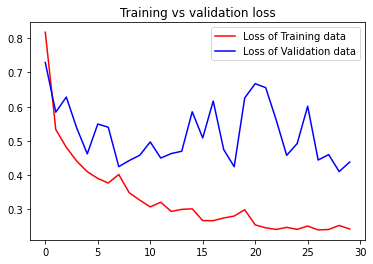

<Figure size 432x288 with 0 Axes>

In [18]:
''' training loss and validation loss graph '''
epochs = range(len(get_loss))
plt.plot(epochs, history.history['loss'], 'r', label='Loss of Training data')
plt.plot(epochs, history.history['val_loss'], 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

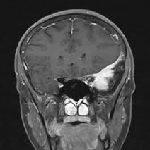

In [31]:
''' loading an image '''
load_img("Testing/meningioma_tumor/image(102).jpg",target_size=(150,150))

In [35]:
''' predicion on new data '''

''' loading an image '''
img = load_img("Testing/meningioma_tumor/image(102).jpg",target_size=(150,150))

''' converting img to array '''
img = img_to_array(img) 

''' scaling '''
img = img / 255.0

''' expanding dimensions '''
img = np.expand_dims(img, axis=0)
img

array([[[[0.08627451, 0.08627451, 0.08627451],
         [0.08627451, 0.08627451, 0.08627451],
         [0.08627451, 0.08627451, 0.08627451],
         ...,
         [0.08235294, 0.08235294, 0.08235294],
         [0.08235294, 0.08235294, 0.08235294],
         [0.08235294, 0.08235294, 0.08235294]],

        [[0.08627451, 0.08627451, 0.08627451],
         [0.08627451, 0.08627451, 0.08627451],
         [0.08627451, 0.08627451, 0.08627451],
         ...,
         [0.08235294, 0.08235294, 0.08235294],
         [0.08235294, 0.08235294, 0.08235294],
         [0.08235294, 0.08235294, 0.08235294]],

        [[0.08627451, 0.08627451, 0.08627451],
         [0.08627451, 0.08627451, 0.08627451],
         [0.08627451, 0.08627451, 0.08627451],
         ...,
         [0.08235294, 0.08235294, 0.08235294],
         [0.08235294, 0.08235294, 0.08235294],
         [0.08235294, 0.08235294, 0.08235294]],

        ...,

        [[0.09019608, 0.09019608, 0.09019608],
         [0.09019608, 0.09019608, 0.09019608]

In [36]:
lbl_encoding = {0:'no_tumor', 1:'pituitary_tumor', 2:'meningioma_tumor', 3:'glioma_tumor'}

def map_label(val):
    return lbl_encoding[val]

''' predicion '''
pred = model.predict(img)

''' retreiving max val from predited values'''
val = np.argmax(pred)
map_val  = map_label(val)

print("Prediction is {}.".format(map_val))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
Prediction is pituitary_tumor.


In [47]:
''' checing shape of test_images '''
print(test_images.shape)

''' predicion on test_images '''
preds2 = model.predict(test_images)

''' checking shape of predicted value'''
print(preds2.shape)

prediction = []
for p in preds2:
    ''' retreiving max val'''
    val2 = np.argmax(p)      
    prediction += [val2]
prediction

(394, 150, 150, 3)
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 849ms/step
(394, 4)


[1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 3,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 3,
 1,
 1,
 2,
 2,
 0,
 3,
 0,
 1,
 2,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 3,
 1,
 1,
 0,
 2,
 3,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 3,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 3,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 2,


In [49]:
actual2 = test_labels
actual2 

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [46]:
''' checking accuracy score'''
accuracy = accuracy_score(actual2, prediction)
print(accuracy)

ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets